In [1]:
# imports

import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o dataset

From Kaggle: https://www.kaggle.com/dev0914sharma/customer-clustering/version/1?select=segmentation+data+legend.xlsx

**Sex** {0:male, 1:female}

**Marital status** {0:single, 1:non-single (divorced / separated / married / widowed)}

**Age** {integer}

**Education** {0:other/unknow, 1:high school, 2:university, 3:graduate school}

**Income** {anual income US dollars}

**Occupation** {0:unemployed/unskilled, 1:skilled employee / official, 2:management / self-employed / highly qualified employee / officer}

**Settlement size** *size of customer's city* {0:small, 1:mid, 2:big}

In [2]:
df = pd.read_csv('../data/segmentation_data.csv')
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


# 1. Descriptive analysis (univariate analysis)

## Common

In [3]:
#data type
df.dtypes

ID                 int64
Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

<AxesSubplot:>

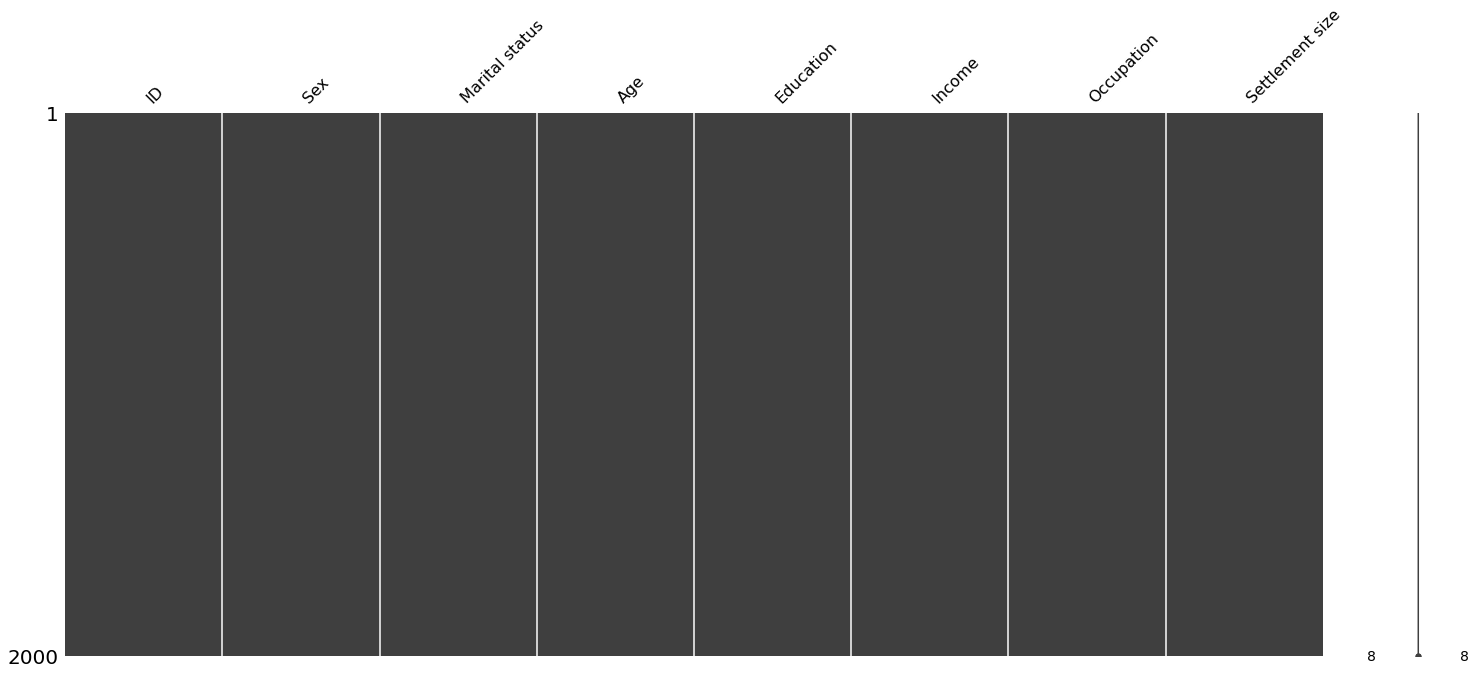

In [4]:
#missing values
msno.matrix(df)

#### Não há dados faltantes

## Numerical

In [5]:
numerical = ['Age', 'Income']

In [6]:
#statistics

df[numerical].describe()

,Age,Income
count,2000.000000,2000.000000
mean,35.909000,120954.419000
std,11.719402,38108.824679
min,18.000000,35832.000000
25%,27.000000,97663.250000
50%,33.000000,115548.500000
75%,42.000000,138072.250000
max,76.000000,309364.000000


<AxesSubplot:xlabel='Age', ylabel='Count'>

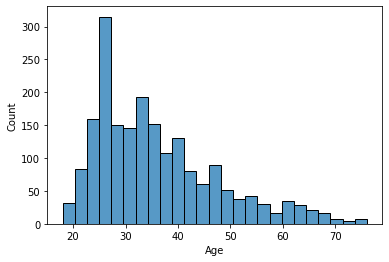

In [7]:
# histograms

sns.histplot(df, x='Age')

<AxesSubplot:xlabel='Income', ylabel='Count'>

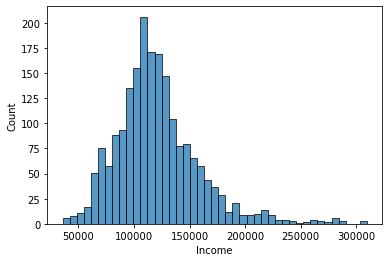

In [8]:
sns.histplot(df, x='Income')

## Categorical

In [9]:
df['Sex'].value_counts()

0    1086
1     914
Name: Sex, dtype: int64

In [10]:
df['Marital status'].value_counts()

0    1007
1     993
Name: Marital status, dtype: int64

In [11]:
df['Education'].value_counts()

1    1386
2     291
0     287
3      36
Name: Education, dtype: int64

In [12]:
df['Occupation'].value_counts()

1    1113
0     633
2     254
Name: Occupation, dtype: int64

In [13]:
df['Settlement size'].value_counts()

0    989
1    544
2    467
Name: Settlement size, dtype: int64

# 2. Correlation analysis (bivariate analysis)

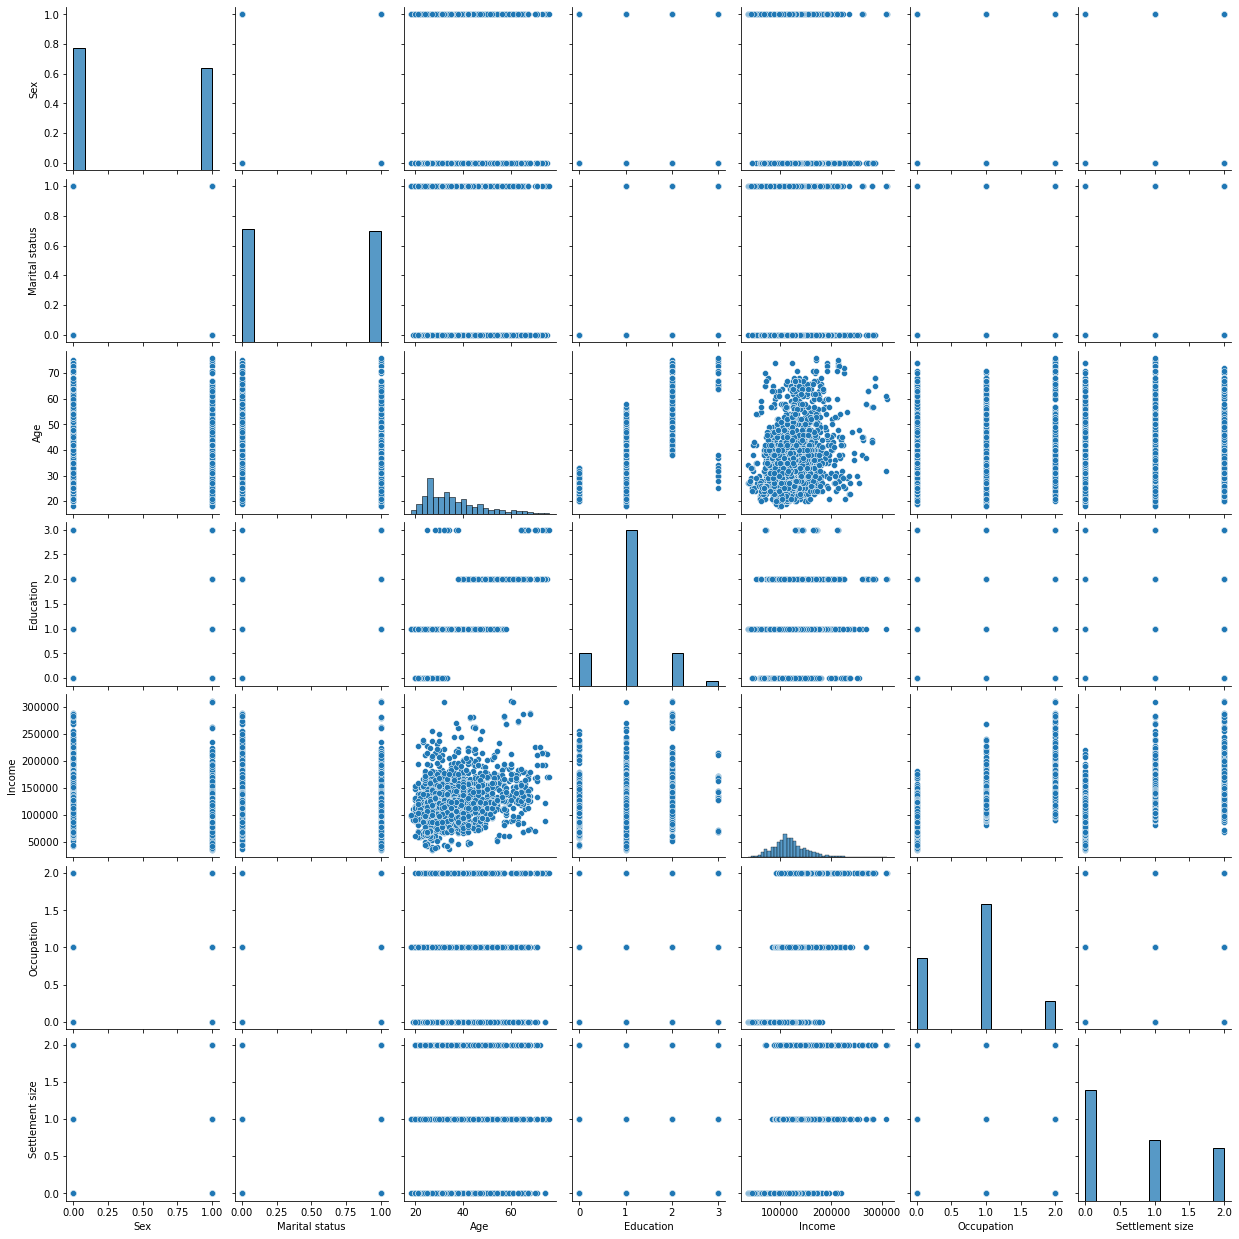

In [14]:
sns.pairplot(df.drop('ID', axis=1))

<AxesSubplot:xlabel='Sex', ylabel='Income'>

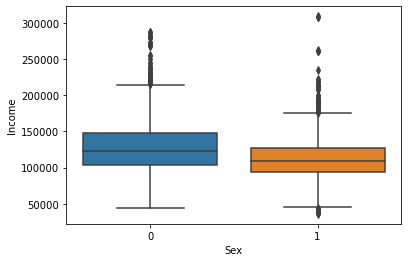

In [15]:
sns.boxplot(data=df, x='Sex', y='Income')

<AxesSubplot:xlabel='Occupation', ylabel='Income'>

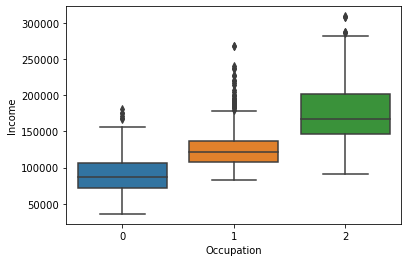

In [16]:
sns.boxplot(data=df, x='Occupation', y='Income')

<AxesSubplot:xlabel='Settlement size', ylabel='Income'>

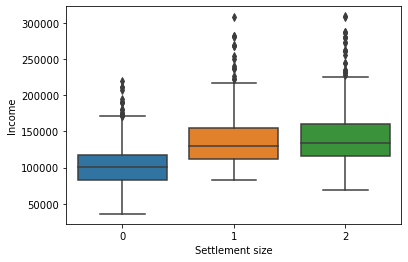

In [17]:
sns.boxplot(data=df, x='Settlement size', y='Income')

<AxesSubplot:xlabel='Education', ylabel='Income'>

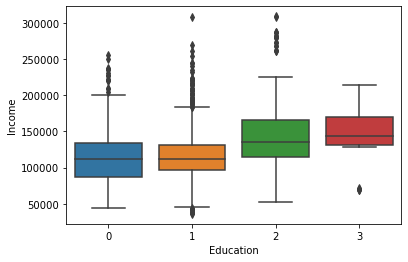

In [18]:
sns.boxplot(data=df, x='Education', y='Income')

<AxesSubplot:xlabel='Education', ylabel='count'>

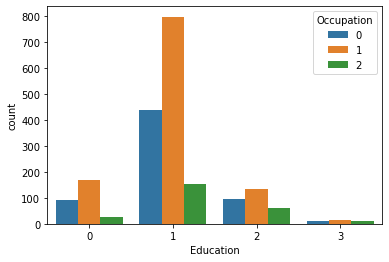

In [19]:
sns.countplot(data=df, x='Education', hue='Occupation')

<AxesSubplot:xlabel='Education', ylabel='count'>

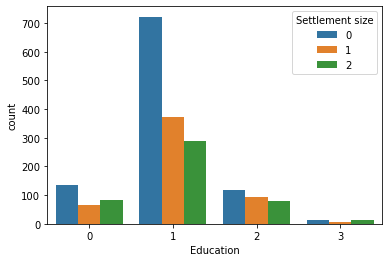

In [20]:
sns.countplot(data=df, x='Education', hue='Settlement size')

# Análise de correlação

<AxesSubplot:>

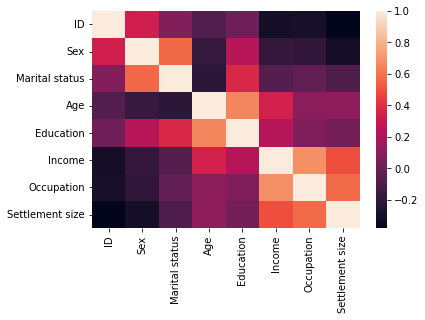

In [21]:
sns.heatmap(df.corr())

# Conclusões EDA

- Homens ganham mais que as mulheres
- Quanto maior o nível de escolaridade, maior os salários
- Quanto maior a cidade onde vive o trabalhador, maior o seu salário

<AxesSubplot:>

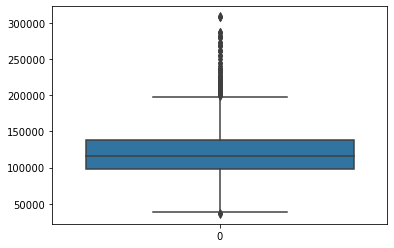

In [11]:
sns.boxplot(data = df['Income'])